# Age,Gender and Ethnicity
Content:
* [Importing Analysis Libraries](#1)
* [Data Overview](#2)
* [Data Distribution](#3)
* [Image Shape](#4)
* [Reshape Data](#5)
* [Images Overview](#6)
* [Importing DL Libraries](#7)
* [Categorizing Target Values](#8)
* [Normalize Data](#9)
* [Image Data Generate](#10)
* [Train Test Split](#11)
* [CallBacks](#12)
* [Model Build for Ethnicity](#13)
* [Ethnicity Prediction](#14)
* [Gender Prediction](#15)
* [Age Prediction](#16)
* [Visualising Predections](#17)

<a id="1"></a><br>
## Importing Analysis Libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="2"></a><br>
## Data Overview

In [2]:
data = pd.read_csv(r"C:\Users\abdel\Downloads\age_gender.csv\age_gender.csv")
print(data.shape)
data

(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [3]:
data = data.drop("img_name", axis=1)

In [4]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [5]:
columns = ["age","gender","ethnicity"]
y = data.drop("pixels", axis = 1)
x = data.drop(columns, axis = 1)

In [6]:
x.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [7]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


<a id="3"></a><br>
## Data Distribution

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


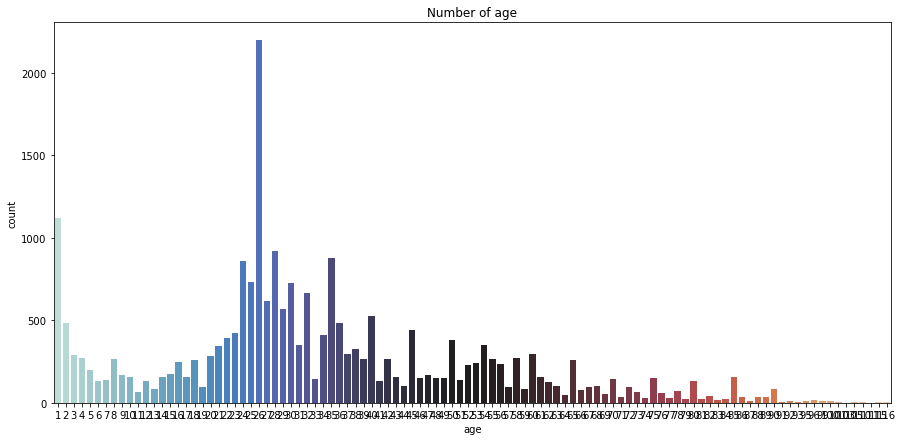

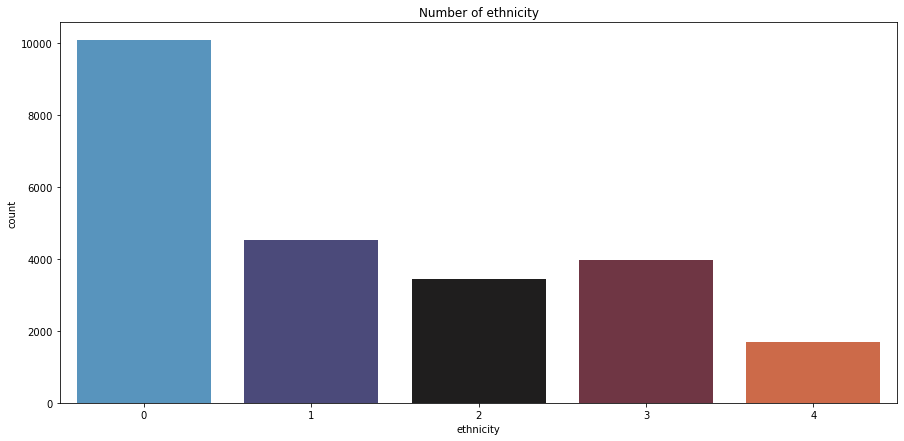

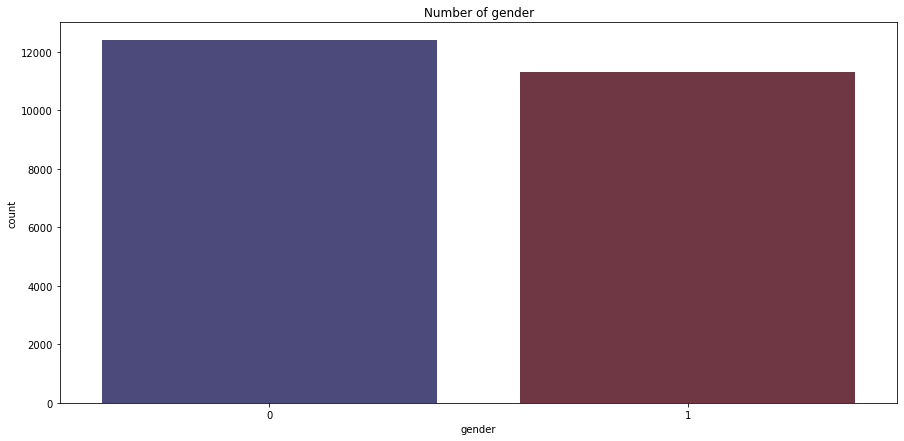

In [ ]:
for i in y.columns :
    plt.figure(figsize=(15,7))
    g = sns.countplot(y[i], palette="icefire")
    plt.title("Number of {}".format(i))

C:\Users\abdel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of age')

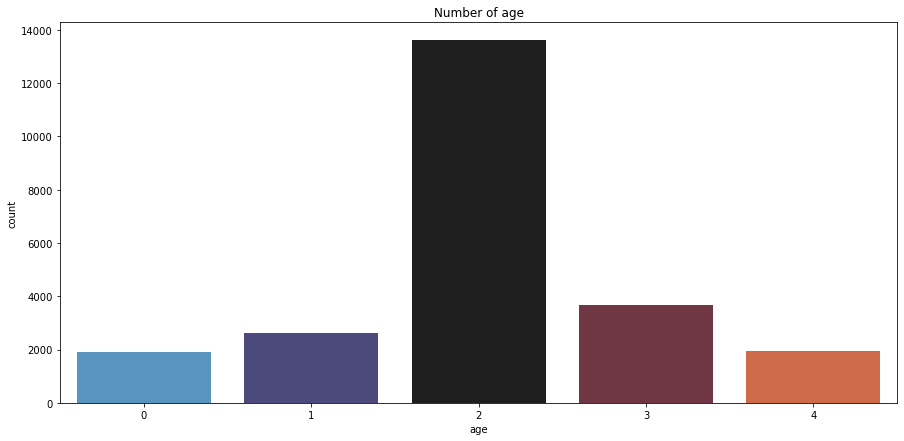

In [10]:
y["age"] = pd.cut(y["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
g = sns.countplot(y["age"], palette="icefire")
plt.title("Number of age")

<a id="4"></a><br>
## Image Shape

In [11]:
num_pixels = len(x['pixels'][0].split(" "))
img_height = int(np.sqrt(len(x['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(x['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


<a id="5"></a><br>
## Reshape Data

In [12]:
x = pd.Series(x["pixels"])
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

x = x.reshape(-1,48,48,1)
print("x shape: ",x.shape)

x shape:  (23705, 48, 48, 1)


<a id="6"></a><br>
## Images Overview

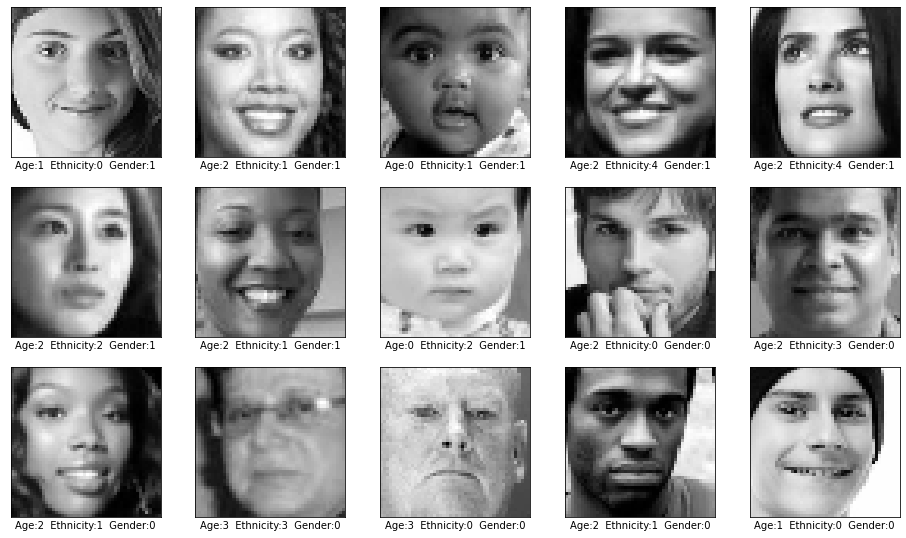

In [13]:
plt.figure(figsize=(16,16))
for i,a in zip(np.random.randint(0, 23705, 25),range(1,16)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i],cmap='gray')
    plt.xlabel(
        "Age:"+str(y['age'].iloc[i])+
        "  Ethnicity:"+str(y['ethnicity'].iloc[i])+
        "  Gender:"+ str(y['gender'].iloc[i])
    )
plt.show()

<a id="7"></a><br>
## Importing DL Libraries

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from keras import regularizers

<a id="8"></a><br>
## Categorizing Target Values

In [15]:
age_matrix = np.array(y["age"]) 
gender_matrix = np.array(y["gender"])
ethnicity_matrix = np.array(y["ethnicity"])
age = to_categorical(age_matrix, num_classes = 5)
gender = to_categorical(y["gender"], num_classes = 2)
ethnicity = to_categorical(ethnicity_matrix, num_classes = 5)
print(age, gender, ethnicity)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]] [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


<a id="9"></a><br>
## Normalize Data

In [16]:
x = x / 255.0

<a id="10"></a><br>
## Image Data Generate

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x)

<a id="11"></a><br>
## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(x, ethnicity, test_size= 0.2,random_state = 42)
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(x, gender, test_size= 0.2,random_state = 42)
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(x, age, test_size= 0.2,random_state = 42)

<a id="12"></a><br>
## Callbacks

In [19]:
early_stopping = [tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1)]

<a id="13"></a><br>
## Model Build for Ethnicity

In [20]:
def my_model(num_classes, activation, loss):
    model = Sequential() 
    model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01),input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
       

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01)))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation= activation))
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

<a id="14"></a><br>
## Ethnicity Prediction Model

In [21]:
epochs = 50 
batch_size = 64
model_ethnicity = my_model(5,"sigmoid",'categorical_crossentropy')
history_ethnicity = model_ethnicity.fit(X_train_ethnicity, y_train_ethnicity, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test_ethnicity,y_test_ethnicity), steps_per_epoch= X_train_ethnicity.shape[0] // batch_size, callbacks= [early_stopping])

Epoch 1/50
296/296 [==============================] - 29s 91ms/step - loss: 1.2600 - accuracy: 0.6064 - val_loss: 1.9979 - val_accuracy: 0.5119
Epoch 2/50
296/296 [==============================] - 28s 94ms/step - loss: 0.9319 - accuracy: 0.7039 - val_loss: 0.8788 - val_accuracy: 0.7300
Epoch 3/50
296/296 [==============================] - 28s 93ms/step - loss: 0.8340 - accuracy: 0.7350 - val_loss: 0.7877 - val_accuracy: 0.7422
Epoch 4/50
296/296 [==============================] - 27s 92ms/step - loss: 0.7813 - accuracy: 0.7446 - val_loss: 0.9512 - val_accuracy: 0.6813
Epoch 5/50
296/296 [==============================] - 25s 83ms/step - loss: 0.7428 - accuracy: 0.7572 - val_loss: 0.7218 - val_accuracy: 0.7737
Epoch 6/50
296/296 [==============================] - 24s 80ms/step - loss: 0.6972 - accuracy: 0.7726 - val_loss: 0.7384 - val_accuracy: 0.7652
Epoch 7/50
296/296 [==============================] - 24s 81ms/step - loss: 0.6648 - accuracy: 0.7806 - val_loss: 0.7685 - val_accuracy:

In [23]:
fig = px.line(
    history_ethnicity.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [24]:
fig = px.line(
    history_ethnicity.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}, 
    title='Training History')
fig.show()

<a id="15"></a><br>
## Gender Prediction Model

In [25]:
    Gendermodel = Sequential() 
    Gendermodel.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01),input_shape=(48,48,1)))
    Gendermodel.add(BatchNormalization())
    Gendermodel.add(MaxPool2D(pool_size=(2, 2)))
       

    Gendermodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01)))
    Gendermodel.add(BatchNormalization())
    Gendermodel.add(MaxPool2D(pool_size=(2, 2)))
    Gendermodel.add(Dropout(0.4))

    
    Gendermodel.add(Flatten())
    Gendermodel.add(Dense(128, activation='relu'))
    Gendermodel.add(Dropout(0.2))
    
    Gendermodel.add(Dense(2, activation= "sigmoid"))
    Gendermodel.compile(optimizer='Adam',
              loss= tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history_gender = Gendermodel.fit(X_train_gender, y_train_gender, batch_size=64,
                              epochs = 50, validation_data = (X_test_gender,y_test_gender), steps_per_epoch= X_train_gender.shape[0] // 64, callbacks= [early_stopping])

Epoch 1/50
296/296 [==============================] - 46s 149ms/step - loss: 0.6423 - accuracy: 0.8129 - val_loss: 0.6337 - val_accuracy: 0.7990
Epoch 2/50
296/296 [==============================] - 43s 147ms/step - loss: 0.4068 - accuracy: 0.8614 - val_loss: 0.5416 - val_accuracy: 0.8199
Epoch 3/50
296/296 [==============================] - 42s 143ms/step - loss: 0.3403 - accuracy: 0.8767 - val_loss: 0.3496 - val_accuracy: 0.8749
Epoch 4/50
296/296 [==============================] - 41s 138ms/step - loss: 0.3146 - accuracy: 0.8814 - val_loss: 0.4057 - val_accuracy: 0.8258
Epoch 5/50
200/296 [===================>..........] - ETA: 13s - loss: 0.2907 - accuracy: 0.8915

In [24]:
fig = px.line(
    history_gender.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [25]:
fig = px.line(
    history_gender.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}, 
    title='Training History')
fig.show()

<a id="16"></a><br>
## Age Prediction Model

In [26]:
AgeModel = Sequential()

AgeModel.add(Conv2D(16, kernel_size=(3,3), input_shape=(48,48,1), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01)))
AgeModel.add(MaxPool2D(pool_size=(2,2)))
AgeModel.add(BatchNormalization())

AgeModel.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer = regularizers.l2(l = 0.01)))
AgeModel.add(MaxPool2D(pool_size=(2,2)))
AgeModel.add(Dropout(0.4))
AgeModel.add(BatchNormalization())


AgeModel.add(Flatten())
AgeModel.add(Dense(256, activation='relu'))

AgeModel.add(Dense(5,activation='sigmoid'))
AgeModel.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

history_age = AgeModel.fit(X_train_age, y_train_age, batch_size=64,
                              epochs = 30, validation_data = (X_test_age,y_test_age),callbacks= [early_stopping])

Epoch 1/30
297/297 [==============================] - 27s 88ms/step - loss: 0.9564 - accuracy: 0.7108 - val_loss: 5.6398 - val_accuracy: 0.0814
Epoch 2/30
297/297 [==============================] - 26s 87ms/step - loss: 0.6850 - accuracy: 0.7713 - val_loss: 2.3845 - val_accuracy: 0.2023
Epoch 3/30
297/297 [==============================] - 26s 87ms/step - loss: 0.5904 - accuracy: 0.7985 - val_loss: 0.6105 - val_accuracy: 0.7965
Epoch 4/30
297/297 [==============================] - 26s 87ms/step - loss: 0.5275 - accuracy: 0.8135 - val_loss: 0.6319 - val_accuracy: 0.7825
Epoch 5/30
297/297 [==============================] - 26s 87ms/step - loss: 0.4686 - accuracy: 0.8375 - val_loss: 0.7761 - val_accuracy: 0.7617
Epoch 6/30
297/297 [==============================] - 26s 87ms/step - loss: 0.4162 - accuracy: 0.8559 - val_loss: 0.8396 - val_accuracy: 0.7503

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/30
297/297 [==============================] - 

In [27]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [28]:
fig = px.line(
    history_age.history, y=['accuracy', 'val_accuracy'],
    labels={'index': 'epoch', 'value': 'accuracy'}, 
    title='Training History')
fig.show()

<a id="17"></a><br>
# Visualising Predections

## Gender Predecting

In [29]:
Prediction_Results_g = Gendermodel.predict(X_test_gender)

In [30]:
Model_Test_Prediction_g = Prediction_Results_g.argmax(axis=-1)

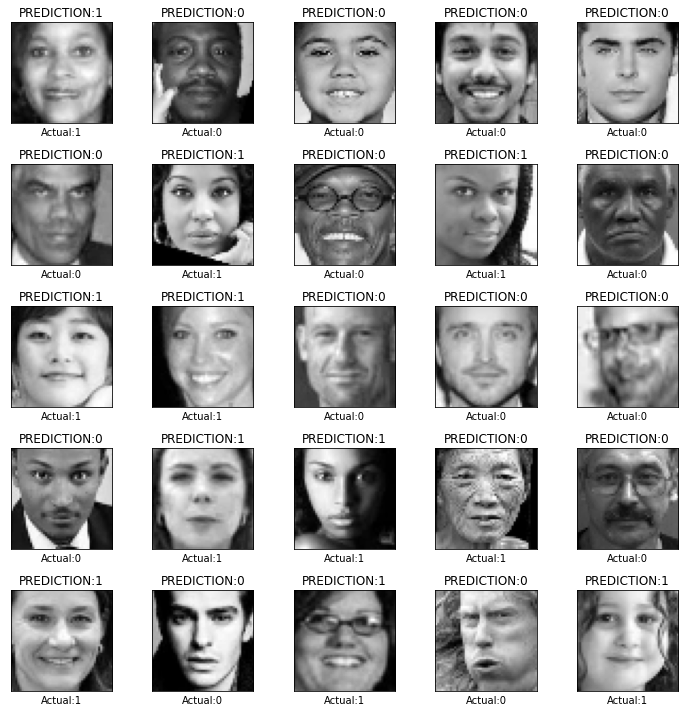

In [31]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_gender[i],cmap='gray')
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_g[i]}")
    ax.set_xlabel(f"Actual:{y_test_gender[i].argmax(axis=-1)}")
plt.tight_layout()
plt.show()

## Ethnicity Predecting

In [32]:
Prediction_Results_e = model_ethnicity.predict(X_test_ethnicity)

In [33]:
Model_Test_Prediction_e = Prediction_Results_e

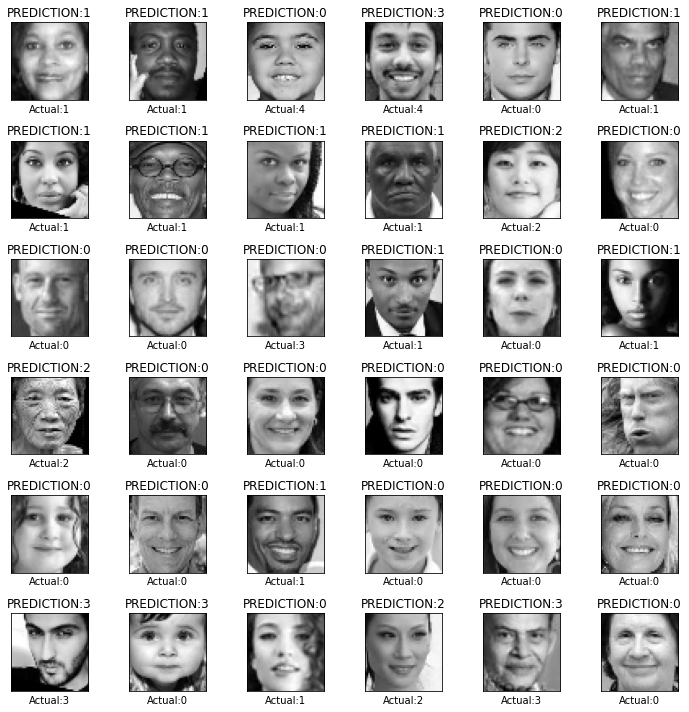

In [34]:
fig, axes = plt.subplots(nrows=6,
                         ncols=6,
                         figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_ethnicity[i],cmap='gray')
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_e[i].argmax(axis=-1)}")
    ax.set_xlabel(f"Actual:{y_test_ethnicity[i].argmax(axis=-1)}")
plt.tight_layout()
plt.show()

## Age Predecting

In [35]:
Prediction_Results_a = AgeModel.predict(X_test_age)

In [36]:
Model_Test_Prediction_a = Prediction_Results_a

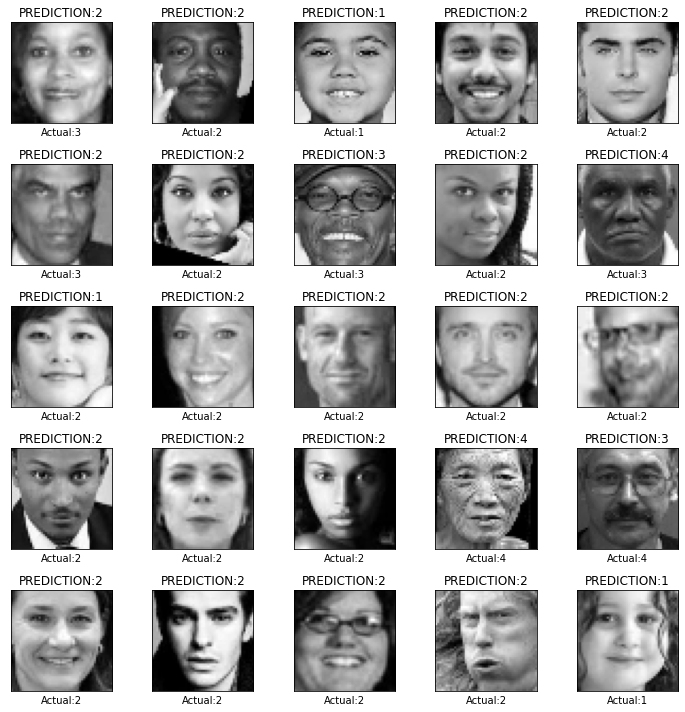

In [37]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_age[i],cmap='gray')
    ax.set_title(f"PREDICTION:{Model_Test_Prediction_a[i].argmax(axis=-1)}")
    ax.set_xlabel(f"Actual:{y_test_age[i].argmax(axis=-1)}")
plt.tight_layout()
plt.show()